<a href="https://colab.research.google.com/github/ptsanthoshkumar/intro-to-langsmith/blob/main/Multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pdfplumber
!pip install pymupdf
!pip install langchain
!pip install pypdf
!pip install PyMuPDF
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.24
    Uninstalling langchain-core-0.3.24:
      Successfully uninstalled langchain-core-0.3.24
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.2
    Uninstalling langchain-text-splitters-0.3.2:
      Successfully uninstalled langchain-text-splitters-0.3.2
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.11
    Uninstalling langchain-0.3.11:
      Successfully uninstalled langchain-0.3.11


In [8]:
import matplotlib.pyplot as plt

In [5]:
import pdfplumber
import langchain_community
from langchain.document_loaders import PyPDFLoader

# List of PDF file paths
pdf_files = ["/content/loads.pdf", "/content/infra.pdf"]

# Initialize an empty list to hold all pages from all PDFs
all_pages = []

for pdf_file in pdf_files:
    # Load the text and split using PyPDFLoader
    pdf_loader = PyPDFLoader(pdf_file)
    pages = pdf_loader.load_and_split()
    all_pages.extend(pages)

    # Extract tables with pdfplumber
    with pdfplumber.open(pdf_file) as pdf:
        for page_number, page in enumerate(pdf.pages):
            tables = page.extract_tables()  # Extract all tables in the page
            if tables:
                for table in tables:
                    print(f"Table found on page {page_number + 1}:")
                    for row in table:
                        print(row)

# Print the text from the 3rd page
print(all_pages[3].page_content)


Table found on page 2:
['Version', 'Changes', 'Modified by', 'Date']
['Draft – 1', '-', 'P T, Santhosh Kumar', '05/11/2024']
['V1.0.0', 'File name, Contents', 'P T, Santhosh Kumar', '19/11/2024']
['V2.0.0', 'File name, Contents', 'P T, Santhosh Kumar', '19/11/2024']
Table found on page 10:
['• Oncology Pre-Validation', None]
['• Trigger OBUReporting-A1-AZ-Configuration-Weekly-Full_686002 – Refer details on the', None]
['next page.', None]
['• Trigger OBUReporting-A1-AZ-Super-Dag-Weekly (JSON File Bucket name: s3://az-us-', None]
['commercial-code-prod/code/) (date_date updated)', None]
['• Crawler Run', None]
[None, '• python /apps/sfo/code/Glue_Crawler.py -c US-Commercial-DataLake-App-Matrix-']
[None, 'OBU-Prod (can be start in parallel to DQM dag of super dag)']
[None, '• python /apps/sfo/code/Glue_Crawler.py -c US-Commercial-Publish-App-Matrix-']
[None, 'OBU-Prod']
['• Post Validation: We need to download the sheet from S3 path for the steps having', None]
['validation status as Fai

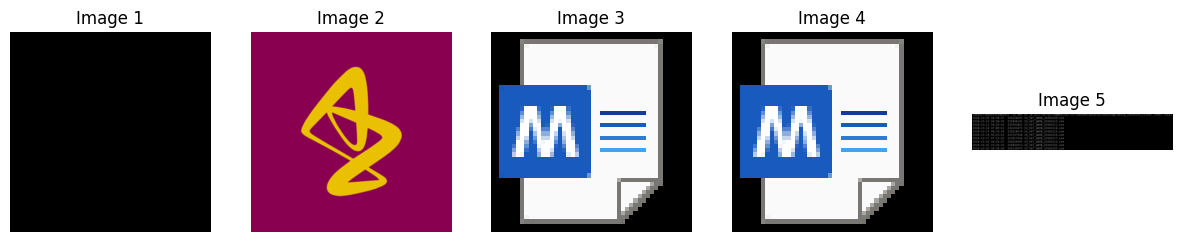

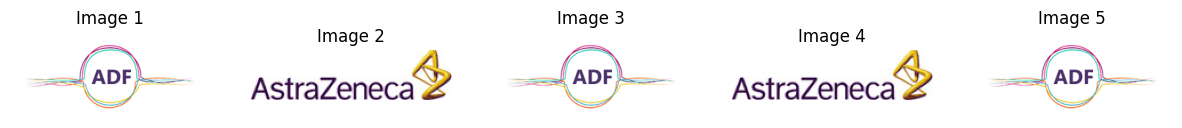

In [12]:
import fitz  # PyMuPDF
import io
from PIL import Image
import matplotlib.pyplot as plt

# Function to extract images from PDF
def extract_images(pdf_file):
    images = []  # List to hold images for later display

    with fitz.open(pdf_file) as doc:
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            img_list = page.get_images(full=True)  # Extract all images on the page

            for img_index, img in enumerate(img_list):
                xref = img[0]
                base_image = doc.extract_image(xref)
                image_bytes = base_image["image"]
                image = Image.open(io.BytesIO(image_bytes))
                images.append(image)  # Store image for later display

                # Optionally, save the image to a file
                image.save(f"/content/page_{page_num + 1}_img_{img_index + 1}.png")

    # Display the first few images (for example, first 5)
    num_images_to_show = min(5, len(images))  # Show up to 5 images, or fewer if less than 5 images
    plt.figure(figsize=(15, 10))

    for i in range(num_images_to_show):
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"Image {i + 1}")

    plt.show()

for pdf_file in pdf_files:
    extract_images(pdf_file)


In [14]:
import pdfplumber
import fitz  # PyMuPDF
from langchain.document_loaders import PyPDFLoader
import io
from PIL import Image


# Initialize an empty list to hold all pages from all PDFs
all_pages = []

for pdf_file in pdf_files:
    # Load text content using PyPDFLoader
    pdf_loader = PyPDFLoader(pdf_file)
    pages = pdf_loader.load_and_split()
    all_pages.extend(pages)

    # Extract tables with pdfplumber
    with pdfplumber.open(pdf_file) as pdf:
        for page_number, page in enumerate(pdf.pages):
            tables = page.extract_tables()
            if tables:
                for table in tables:
                    print(f"Table found on page {page_number + 1}:")
                    for row in table:
                        print(row)

    # Extract images with PyMuPDF (fitz)
    with fitz.open(pdf_file) as doc:
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            img_list = page.get_images(full=True)
            for img_index, img in enumerate(img_list):
                xref = img[0]
                base_image = doc.extract_image(xref)
                image_bytes = base_image["image"]
                image = Image.open(io.BytesIO(image_bytes))
                image.show()  # Show image
                image.save(f"/content/page_{page_num + 1}_img_{img_index + 1}.png")

# Print text from the 3rd page
print(all_pages[3].page_content)


Table found on page 2:
['Version', 'Changes', 'Modified by', 'Date']
['Draft – 1', '-', 'P T, Santhosh Kumar', '05/11/2024']
['V1.0.0', 'File name, Contents', 'P T, Santhosh Kumar', '19/11/2024']
['V2.0.0', 'File name, Contents', 'P T, Santhosh Kumar', '19/11/2024']
Table found on page 10:
['• Oncology Pre-Validation', None]
['• Trigger OBUReporting-A1-AZ-Configuration-Weekly-Full_686002 – Refer details on the', None]
['next page.', None]
['• Trigger OBUReporting-A1-AZ-Super-Dag-Weekly (JSON File Bucket name: s3://az-us-', None]
['commercial-code-prod/code/) (date_date updated)', None]
['• Crawler Run', None]
[None, '• python /apps/sfo/code/Glue_Crawler.py -c US-Commercial-DataLake-App-Matrix-']
[None, 'OBU-Prod (can be start in parallel to DQM dag of super dag)']
[None, '• python /apps/sfo/code/Glue_Crawler.py -c US-Commercial-Publish-App-Matrix-']
[None, 'OBU-Prod']
['• Post Validation: We need to download the sheet from S3 path for the steps having', None]
['validation status as Fai